<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="float:right; max-width: 250px; display: inline"  alt="Wikistat"/></a>

</center>

# <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 200px; display: inline" alt="Python"/></a> [pour Statistique et Science des Données](https://github.com/wikistat/Intro-Python)

# Apprentissage Statistique / Machine avec <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 150px; display: inline" alt="Python"/></a> & <a href="http://scikit-learn.org/stable/#"><img src="http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" style="max-width: 180px; display: inline" alt="Scikit-Learn"/></a>
**Résumé**: Ce calepin introduit l'utilisation de la librairie `scikit-learn` pour la modélisation et l'apprentissage. Pourquoi utiliser `scikit-learn` ? Ou non ? Liste des fonctionnalités, quelques exemples de mise en oeuvre de modélisation ([régression logistique](http://wikistat.fr/pdf/st-m-app-rlogit.pdf), [$k$-plus proches voisins](http://wikistat.fr/pdf/st-m-app-add.pdf), [arbres de décision](http://wikistat.fr/pdf/st-m-app-cart.pdf), [forêts aléatoires](http://wikistat.fr/pdf/st-m-app-agreg.pdf). Optimisation des paramètres (complexité) des modèles par [validation croisée](http://wikistat.fr/pdf/st-m-app-risque-estim.pdf). Fontions de chaînage (*pipeline*) de transformations et estimations. D'autres fonctionalités de `Scikit-learn` sont abordées dans les calepins du [dépot sur l'apprentissage](https://github.com/wikistat/Apprentissage) statistique. 

# <FONT COLOR="Red">Première partie: Exploration</font>

## Chargement des données

In [13]:
# Lire les données d'apprentissage
import pandas as pd
path='/home/odemoly/Documents/Certificat_BD/Second_Projet/2 - public_dat/'  # si les données sont déjà dans le répertoire courant
# path='http://www.math.univ-toulouse.fr/~besse/Wikistat/data/'
input_string_train = path + 'store_train.data'
#df_train = pd.DataFrame([x.split(' ') for x in input_string_train.split('\n')],columns=["ID","Day","Date","Number_of_Customers","Open","Promo","State_Holiday","School_Holiday"],
                  #dtype=int)
                  #{"ID":int,"Day":int,"Date":object,"Number_of_Customers":int,"Open":int,"Promo":int,"State_Holiday":int,"School_Holiday":int})
df_train = pd.read_csv(input_string_train ,sep=" ",header=None, names = ["ID", "Day", "Date", "Number_of_Customers", "Open", "Promo", "State_Holiday", "School_Holiday"])

# Lire les données de test
input_string_test = path + 'store_test.data'
df_test = pd.read_csv(input_string_test ,sep=" ",header=None, names = ["ID", "Day", "Date", "Number_of_Customers", "Open", "Promo", "State_Holiday", "School_Holiday"])



##### solutions
input_string_sol = path + 'store_train.solution'
df_sol = pd.read_csv(input_string_sol ,sep=" ",header=None, names = ["Sales"])


df_full_train=pd.concat([df_train,df_sol],axis=1)

df_train = df_full_train
df_train.dtypes


# Redéfinir les types 
df_train["ID"]=pd.DataFrame(df_train["ID"], dtype=int)
#df_train["Day"]=pd.DataFrame(df_train["Day"],dtype=int)
df_train["Day"]=pd.Categorical(df_train["Day"],ordered=False)
df_train["Date"]=pd.DataFrame(df_train["Date"],dtype="datetime64[ns]")
df_train["Open"]=pd.DataFrame(df_train["Open"],dtype=bool)
df_train["Promo"]=pd.DataFrame(df_train["Promo"],dtype=bool)
df_train["State_Holiday"]=pd.Categorical(df_train["State_Holiday"], ordered=False)
df_train["School_Holiday"]=pd.DataFrame(df_train["School_Holiday"],dtype=bool)
df_train["Number_of_Customers"]=pd.DataFrame(df_train["Number_of_Customers"],dtype=int)
df_train["Sales"]=pd.DataFrame(df_train["Sales"],dtype=int)
df_train['Month'] = df_train['Date'].map(lambda d: d.month)
df_train["Month"]=pd.DataFrame(df_train["Month"],dtype=int)
df_train['Jour'] = df_train['Date'].map(lambda d: d.day)
df_train["Jour"]=pd.DataFrame(df_train["Jour"],dtype=int)



# Redéfinir les types 
df_test["ID"]=pd.DataFrame(df_test["ID"],dtype=int)
#df_test["Day"]=pd.DataFrame(df_test["Day"],dtype=int)
df_test["Day"]=pd.Categorical(df_test["Day"],ordered=False)
df_test["Date"]=pd.DataFrame(df_test["Date"],dtype="datetime64[ns]")
df_test["Open"]=pd.DataFrame(df_test["Open"],dtype=bool)
df_test["Promo"]=pd.DataFrame(df_test["Promo"],dtype=bool)
df_test["State_Holiday"]=pd.Categorical(df_test["State_Holiday"],ordered=False)
df_test["School_Holiday"]=pd.DataFrame(df_test["School_Holiday"],dtype=bool)
df_test["Number_of_Customers"]=pd.DataFrame(df_test["Number_of_Customers"],dtype=int)
df_test['Month'] = df_test['Date'].map(lambda d: d.month)
df_test["Month"]=pd.DataFrame(df_test["Month"],dtype=int)
df_test.dtypes

df_StH=pd.DataFrame(pd.get_dummies(df_train[["State_Holiday","Day"]]))
#df_train["State_Holiday"]=df_train["State_Holiday"].cat.rename_categories(["0","a","b","c"])

df_train = pd.concat([df_train,df_StH],axis= 1)



In [14]:
#creer une liste state_holiday avec True si oui, False si non
state_holiday = []
for vac in df_train["State_Holiday"]:
    if vac == "0":
        state_holiday.append(False)
    else:
        state_holiday.append(True)
df_train["StH"] = state_holiday

In [15]:
#creer une liste state_holiday avec True si oui, False si non pour valeurs test
state_holiday_test = []
for vac in df_test["State_Holiday"]:
    if vac == "0":
        state_holiday_test.append(False)
    else:
        state_holiday_test.append(True)
df_test["StH"] = state_holiday_test

In [16]:
#creer une liste week_day avec True si oui, False si dimanche
week_day = []
for day in df_train["Day"]:
    if day < 7:
        week_day.append(True)
    else:
        week_day.append(False)
df_train["WeekDay"] = week_day

In [17]:
#creer une liste week_day avec True si oui, False si dimanche pour test
week_day_test = []
for day in df_test["Day"]:
    if day < 7:
        week_day_test.append(True)
    else:
        week_day_test.append(False)
df_test["WeekDay"] = week_day_test

df_train.dtypes

ID                              int64
Day                          category
Date                   datetime64[ns]
Number_of_Customers             int64
Open                             bool
Promo                            bool
State_Holiday                category
School_Holiday                   bool
Sales                           int64
Month                           int64
Jour                            int64
State_Holiday_0                 uint8
State_Holiday_a                 uint8
State_Holiday_b                 uint8
State_Holiday_c                 uint8
Day_1                           uint8
Day_2                           uint8
Day_3                           uint8
Day_4                           uint8
Day_5                           uint8
Day_6                           uint8
Day_7                           uint8
StH                              bool
WeekDay                          bool
dtype: object

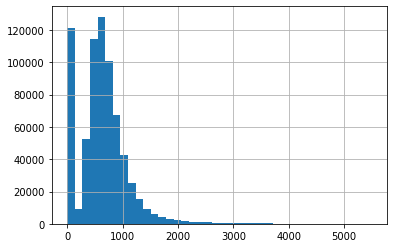

In [18]:
import matplotlib.pyplot as plt
df_train["Number_of_Customers"].hist(bins=40)
plt.show()

/home/odemoly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


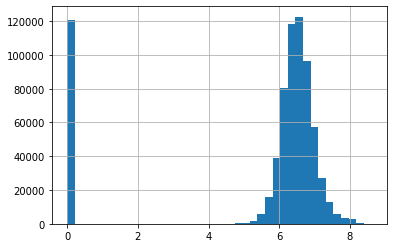

In [20]:
df_train['Number_of_Customers'][df_train['Number_of_Customers']==0]=1
from math import sqrt, log
df_train["L_Number_of_Customers"]=df_train["Number_of_Customers"].map(lambda x: log(x))

df_train["L_Number_of_Customers"].hist(bins=40)
plt.show()

## Première analyse des données et réduction

In [21]:
X_ana = df_train[['ID','Day','L_Number_of_Customers','Number_of_Customers','Open','Promo','School_Holiday','Month','Jour','Day_1','Day_2','Day_3','Day_4','Day_5','Day_6','Day_7','State_Holiday_0','State_Holiday_a','State_Holiday_b','State_Holiday_c','StH','WeekDay']]
y_ana = df_train[['Sales']]

In [77]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

model_lin = LinearRegression()
model_lin.fit(X_ana,y_ana)

import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model_lin, random_state=1,scoring = 'r2').fit(X_ana,y_ana)
eli5.show_weights(perm, feature_names = ['ID','Day','L_Number_of_Customers','Number_of_Customers','Open','Promo','School_Holiday','Month','Jour','Day_1','Day_2','Day_3','Day_4','Day_5','Day_6','Day_7','State_Holiday_0','State_Holiday_a','State_Holiday_b','State_Holiday_c','StH','WeekDay'])


Weight,Feature
4.3076 ± 0.0125,L_Number_of_Customers
2.7960 ± 0.0079,Open
0.4128 ± 0.0009,Number_of_Customers
0.0542 ± 0.0003,Promo
0.0045 ± 0.0001,Day_6
0.0034 ± 0.0000,Day
0.0016 ± 0.0001,Day_1
0.0010 ± 0.0001,StH
0.0010 ± 0.0000,State_Holiday_0
0.0009 ± 0.0000,WeekDay


# Regression linéaire

In [79]:
list_features = ['ID','Day','L_Number_of_Customers','Number_of_Customers','Promo','School_Holiday','Month','Jour','Day_1','Day_2','Day_3','Day_4','Day_5','Day_6','Day_7','State_Holiday_0','State_Holiday_a','State_Holiday_b','State_Holiday_c','StH','WeekDay']
for name in list_features:

    #Number_of_Customers
    model_lin = LinearRegression()
    model_lin.fit(df_train[[name]][df_train['Open']==True][:500000],df_train[['Sales']][df_train['Open']==True][:500000])

    # Validation
    z_chap=model_lin.predict(df_train[[name]][df_train['Open']==True][500001:])
    print()
    print("MSE_{} = ".format(name),mean_squared_error(df_train[['Sales']][df_train['Open']==True][500001:],z_chap))
    print("R2_{} = ".format(name),r2_score(df_train[['Sales']][df_train['Open']==True][500001:],z_chap))
    print()


MSE_ID =  9697485.566501567
R2_ID =  0.0001344457783484243


MSE_Day =  9396208.738495706
R2_Day =  0.031197789007112453


MSE_L_Number_of_Customers =  3091260.556393351
R2_L_Number_of_Customers =  0.6812735705285704


MSE_Number_of_Customers =  3116156.8393561817
R2_Number_of_Customers =  0.6787066230871966


MSE_Promo =  8414317.161629995
R2_Promo =  0.13243635842347112


MSE_School_Holiday =  9682180.622363381
R2_School_Holiday =  0.0017124719943317768


MSE_Month =  9643754.667162715
R2_Month =  0.00567440508819772


MSE_Jour =  9669546.513765339
R2_Jour =  0.0030151199754862024


MSE_Day_1 =  9398983.279710777
R2_Day_1 =  0.03091171813124516


MSE_Day_2 =  9694927.9864899
R2_Day_2 =  0.00039814672827986897


MSE_Day_3 =  9689057.862507133
R2_Day_3 =  0.0010033896780249352


MSE_Day_4 =  9692388.624008551
R2_Day_4 =  0.0006599693479034663


MSE_Day_5 =  9696885.580776408
R2_Day_5 =  0.00019630769662593028


MSE_Day_6 =  9457740.676621746
R2_Day_6 =  0.02485349852121066


MSE_Day_7

In [80]:
features = ['ID','Day','L_Number_of_Customers','Number_of_Customers','Promo','School_Holiday','Month','Jour','Day_1','Day_2','Day_3','Day_4','Day_5','Day_6','Day_7','State_Holiday_0','State_Holiday_a','State_Holiday_b','State_Holiday_c','StH','WeekDay']
#Promo
model_lin_promo = LinearRegression()
model_lin_promo.fit(df_train[features][df_train['Open']==True][:400000],df_train[['Sales']][df_train['Open']==True][:400000])

# Validation
z_chap=model_lin_promo.predict(df_train[features][df_train['Open']==True][400001:])
print("MSE=",mean_squared_error(df_train[['Sales']][df_train['Open']==True][400001:],z_chap))
print("R2=",r2_score(df_train[['Sales']][df_train['Open']==True][400001:],z_chap))

MSE= 2372573.7876501693
R2= 0.7522348628935307


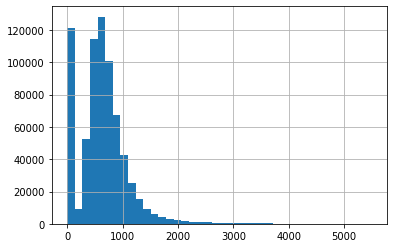

6.329720905522696

# Regression Lasso

In [82]:
from sklearn.linear_model import Lasso

features = ['L_Number_of_Customers','Promo','Day_7']
#Promo
model_lasso = Lasso()
model_lasso.fit(df_train[features][:400000],df_train[['Sales']][:400000])

# Validation
z_chap=model_lasso.predict(df_train[features][400001:450000])
print("MSE=",mean_squared_error(df_train[['Sales']][400001:450000],z_chap))
print("R2=",r2_score(df_train[['Sales']][400001:450000],z_chap))

MSE= 5127381.83569
R2= 0.6572472532502505


# Regression Logistique

In [ ]:
from sklearn.linear_model import LogisticRegression

features = ['Number_of_Customers','Promo','Day_7']
#Promo
model_log = LogisticRegression()
model_log.fit(df_train[features][:400000],df_train[['Sales']][:400000])

# Validation
z_chap=model_log.predict(df_train[features][400001:])
print("MSE=",mean_squared_error(df_train[['Sales']][400001:],z_chap))
print("R2=",r2_score(df_train[['Sales']][400001:],z_chap))

/home/odemoly/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/odemoly/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/odemoly/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [117]:
from sklearn.preprocessing import scale

features = ['L_Number_of_Customers','Number_of_Customers','Promo','School_Holiday','Day_1','Day_2','Day_3','Day_4','Day_5','Day_6','Day_7','StH']

X = df_train[features][:508000][df_train['Open']==True]
y = df_train[['Sales']][:508000][df_train['Open']==True]

X['L_Number_of_Customers']=scale(X['L_Number_of_Customers'])
X['Number_of_Customers']=scale(X['Number_of_Customers'])

X_test = df_train[features][508001:][df_train['Open']==True]
y_test = df_train[['Sales']][508001:][df_train['Open']==True]

y_test_open = df_train[['Sales']][508001:]

X_test['L_Number_of_Customers']=scale(X_test['L_Number_of_Customers'])
X_test['Number_of_Customers']=scale(X_test['Number_of_Customers'])


X[X == True] = 1
X[X == False] = 0
X_test[X_test == True] = 1
X_test[X_test == False] = 0


/home/odemoly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/home/odemoly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/odemoly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/home/odemoly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


# ACP

In [129]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import numpy as np

df_train['Number_of_Customers'] = scale(df_train['Number_of_Customers'])
df_test['Number_of_Customers'] = scale(df_test['Number_of_Customers'])

X_tot_train = df_train[["WeekDay", "Number_of_Customers","Open","Promo","School_Holiday","StH"]].values
Y_tot_train = df_train[['Sales']].values.ravel()

X_tot_test = df_test[["WeekDay", "Number_of_Customers","Open","Promo","School_Holiday","StH"]].values


X_tot_train[X_tot_train == True] = 1
X_tot_train[X_tot_train == False] = 0

X_tot_test[X_tot_test == True] = 1
X_tot_test[X_tot_test == False] = 0

X_tot_test = scale(X_tot_test)
X_tot_train = scale(X_tot_train)




In [130]:

# réduction des variables

pca = PCA()
valPropres=pca.fit(X_tot_train).explained_variance_
valPropres=pca.fit(X).explained_variance_
print(valPropres)


[1.14676222e+00 2.51613991e-01 1.66766423e-01 1.50870405e-01
 1.43799933e-01 1.43320898e-01 1.42692826e-01 1.38843314e-01
 8.37643486e-02 3.99133931e-02 2.24213106e-03 1.67334840e-31]


In [131]:
pca.components_.T

array([[ 9.20458712e-01,  2.21611295e-01,  2.74646402e-01,
         7.03115963e-02,  6.33144067e-03, -8.60684940e-03,
         1.33092607e-02,  1.29289099e-01,  5.30787530e-02,
         5.77722413e-02, -1.03859387e-02,  3.02671847e-16],
       [ 2.50740356e-01, -3.17717889e-02, -5.43777594e-01,
        -1.13446479e-01, -7.89920957e-03,  1.21927476e-02,
        -1.83125183e-02, -1.68600343e-01, -2.57222042e-01,
        -4.22394204e-01,  5.94981618e-01, -2.06914225e-16],
       [ 1.87914484e-01, -7.90096118e-01,  6.79770149e-02,
        -3.64972124e-01, -1.26044544e-02,  3.54362831e-02,
        -5.94400800e-02, -8.17099666e-02,  4.35338307e-01,
        -3.77097209e-02,  6.71087508e-03,  7.60496069e-17],
       [ 3.69659813e-02, -2.12527122e-01, -2.37778348e-01,
         8.50343356e-01,  8.28370400e-03, -8.21000928e-02,
         1.22926286e-01,  3.16503994e-02,  3.66943005e-01,
        -1.27570685e-01,  5.09629458e-04,  1.68921282e-16],
       [ 5.91524945e-02, -7.23734048e-02,  2.2105878

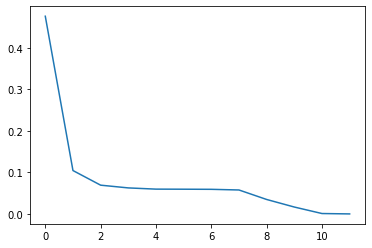

In [134]:
C_train = pca.fit(X).transform(X)
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [ ]:
## Estimation, calcul des composantes principales
C_train = pca.fit(X_tot_train).transform(X_tot_train)[:,:5]
print(C_train.shape)

C_test = pca.fit(X_tot_test).transform(X_tot_test)[:,:5]

## Décroissance de la variance expliquée
plt.plot(pca.explained_variance_ratio_)
plt.show()

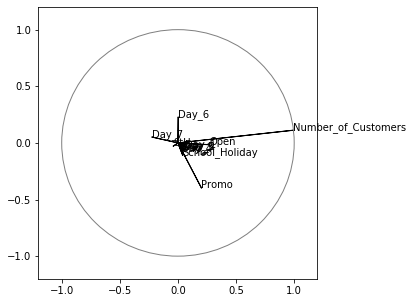

In [133]:
## coordonnées et représentation des variables
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
coord3=pca.components_[2]*np.sqrt(pca.explained_variance_[2])
coord4=pca.components_[3]*np.sqrt(pca.explained_variance_[3])

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
#for i, j, nom in zip(coord1,coord2, df_train[["WeekDay", "Number_of_Customers","Open","Promo","School_Holiday","StH","Sales"]].columns):
for i, j, nom in zip(coord1,coord2, X.columns):

    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

Il est nécessaire de transformer les données car `scikit-learn` ne reconnaît pas la classe `DataFrame` de `pandas`, ce qui est bien dommage. Les variables qualitatives sont comme précédemment remplacées par les indicatrices de leurs modalités et les variables quantitatives conservées. Cela introduit une évidente redondance dans les données mais les procédures de sélection de modèle feront le tri.

On peut voir que quelquesoit la période de vacances a, b ou c, la direction des variables dans le plan principal est la même donc on la regroupe sous un boolean. De même, la variable ID ne represente aucune variance.

Cela a permis également de mieux représenter la variable School_Holiday.
On regarde maintenant si on peut encore regrouper nos points selon 2 groupes, représentés dans le plan principal

# <FONT COLOR="Red">Deuxième partie: Prévision</font>

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train_2,X_test_2,y_train_2,y_test_2=train_test_split(df_train[["WeekDay", "Number_of_Customers","Open","Promo","School_Holiday","StH"]],df_train[["Sales"]],test_size=2/7,random_state=11)



C_train_sample = C_train[:510000]
C_test_sample = C_train[510001:]
Y_train_sample = Y_tot_train[:510000]
Y_test_sample = Y_tot_train[510001:]


## Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

model_lin = LinearRegression()
model_lin.fit(X_tot_train,Y_tot_train)

# Validation
z_chap=model_lin.predict(X_tot_test)
#print("MSE=",mean_squared_error(X_tot_test,z_chap))
#print("R2=",r2_score(Y_test_sample,z_chap))



In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X = X_tot_train
y = Y_tot_train

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

#["WeekDay", "Number_of_Customers","Open","Promo","School_Holiday","StH"]

In [ ]:
Y_tot_train.shape

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model_lin, random_state=1,scoring = 'r2').fit(X_tot_train, Y_tot_train)
eli5.show_weights(perm, feature_names = ["WeekDay", "Number_of_Customers","Open","Promo","School_Holiday","StH"])


## Regression Lasso

## Gaussian Process 

In [ ]:
from sklearn.datasets import make_friedman2
X_friedman, y_friedman = make_friedman2(n_samples=500, noise=0, random_state=0)

In [ ]:
X_friedman.shape

In [ ]:
#df_train['Number_of_Customers']=scale(df_train['Number_of_Customers'])
#df_test['Number_of_Customers']=scale(df_test['Number_of_Customers'])

#X_train_2 = df_train[["WeekDay", "Number_of_Customers","Open","Promo","School_Holiday","StH"]]
#y_train_2 = df_train[['Sales']]
#X_test_2 = df_test[["WeekDay", "Number_of_Customers","Open","Promo","School_Holiday","StH"]]

##X_train_2['Number_of_Customers2'] = scale(X_train_2['Number_of_Customers'])
#Y_train = y_train_2
##X_test_2['Number_of_Customers'] = scale(X_test_2['Number_of_Customers'])

#X_train = X_train_2.values
#Y_train = Y_train.values.ravel()
#X_test = X_test_2.values
##Y_test = y_test_2.values.ravel()

#X_train[X_train == True] = 1
#X_train[X_train == False] = 0

#X_test[X_test == True] = 1
#X_test[X_test == False] = 0


In [ ]:
Y_tot_train

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
gp = GaussianProcessRegressor()
#X_train_2['Number_of_Customers']=scale(X_train_2['Number_of_Customers'])
#df_train['Number_of_Customers']=scale(df_train['Number_of_Customers'])
#Y=y_train_2

In [ ]:
i = 0
while i < 100:
    #df_sample = df_train.sample(7000)
    #gp.fit(df_sample[["WeekDay", "Number_of_Customers","Open","Promo","School_Holiday","StH"]], df_sample[["Sales"]])
    #batch
    gp.fit(C_train[i*7000:(i+1)*7000-1,:],Y_tot_train[i*7000:(i+1)*7000-1,])
    i+=1

In [ ]:
C_test[-2:]

In [ ]:
y_predict = []
j=0
while len(y_predict) < len(C_test)-7000:
    y_tempo = gp.predict(C_test[j*7000:(j+1)*7000-1])
    j+=1
    for k in range(len(y_tempo)):
        y_predict.append(y_tempo[k])


In [ ]:
y_tempo_f = gp.predict(C_test[-(len(C_test)-len(y_predict)):])

In [ ]:
for k in range(len(y_tempo_f)):
    y_predict.append(y_tempo_f[k])

In [ ]:
y_predict_v1 = y_predict

In [ ]:
for index, row in X_test_2[0:1].iterrows():
    r = pd.DataFrame(row)
r.transpose()

In [ ]:
# Prévision
#X_test_2['Number_of_Customers'] = scale(X_test_2['Number_of_Customers'])
y_chap = []
for i in range(len(X_test)):
    y_p = gp.predict(X_test[i])
    y_chap.append(y_p)

In [ ]:
len(df_test['WeekDay'])

In [ ]:
list_weekday = list(df_test['WeekDay'])

In [ ]:
for i in range(len(list_weekday)):
    if list_weekday[i]==False:
        y_predict[i]=0

In [ ]:
from sklearn.metrics import mean_squared_error

RMSE = np.sqrt(mean_squared_error(y_chap, y_test_2))
print(RMSE)


In [ ]:
np.savetxt("store_test.predict", y_predict,  fmt='%i')

In [ ]:
C_test

## Neural Network

In [ ]:
#X_train_2['Number_of_Customers'] = scale(X_train_2['Number_of_Customers'])
#Y_train = y_train_2
#X_test_2['Number_of_Customers'] = scale(X_test_2['Number_of_Customers'])#

#X_train = X_train_2.values
#Y_train = Y_train.values.ravel()
#X_test = X_test_2.values
#Y_test = y_test_2.values.ravel()

#X_train[X_train == True] = 1
#X_train[X_train == False] = 0

#X_train = X_train[:20000]
#Y_train = Y_train[:20000]

In [95]:
#X_train[X_train == True] = 1
#X_train[X_train == False] = 0
#X_test[X_test == True] = 1
#X_test[X_test == False] = 0
#Y_tot_train.shape
#X['Number_of_Customers']=scale(X['Number_of_Customers'])

NameError: name 'scale' is not defined

In [129]:
from sklearn.neural_network import MLPRegressor

#myNN = MLPRegressor(hidden_layer_sizes=(64,128,64), activation='relu', 
#                    solver='sgd',learning_rate_init=0.01, max_iter=2000)
#10M

myNN = MLPRegressor(hidden_layer_sizes=(64,64), activation='relu', 
                    solver='adam',batch_size=128, max_iter=50, verbose=True, alpha = 0.8)

#faire du dropout

#10M
#myNN = MLPRegressor(hidden_layer_sizes=(100,10), activation='logistic')
#18M
#myNN = MLPRegressor(hidden_layer_sizes=(1000,100), activation='logistic', solver='sgd', max_iter=2000)
#10M
#myNN = MLPRegressor(hidden_layer_sizes=(10,5), activation='logistic', solver='sgd', max_iter=10000, learning_rate='adaptive', n_iter_no_change=1e9)
#

In [130]:
myNN.fit(X,y)

/home/odemoly/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 4278719.90073568
Iteration 2, loss = 1167939.05344532
Iteration 3, loss = 1149467.80987495
Iteration 4, loss = 1139814.78105967
Iteration 5, loss = 1135385.67481477
Iteration 6, loss = 1132231.97411956
Iteration 7, loss = 1130062.53905362
Iteration 8, loss = 1128282.49398032
Iteration 9, loss = 1126723.66194604
Iteration 10, loss = 1125794.97835558
Iteration 11, loss = 1124945.44887740
Iteration 12, loss = 1124377.68042808
Iteration 13, loss = 1124011.56756457
Iteration 14, loss = 1123317.53240188
Iteration 15, loss = 1122572.68088762
Iteration 16, loss = 1122123.27835043
Iteration 17, loss = 1121761.51696650
Iteration 18, loss = 1121138.07777689
Iteration 19, loss = 1120609.99583017
Iteration 20, loss = 1120256.26185455
Iteration 21, loss = 1119794.87160615
Iteration 22, loss = 1119467.22215627
Iteration 23, loss = 1118895.30753431
Iteration 24, loss = 1118668.57215453
Iteration 25, loss = 1117973.76343767
Iteration 26, loss = 1117739.27068750
Iteration 27, loss = 

/home/odemoly/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.8, batch_size=128, beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(64, 64), learning_rate='constant',
             learning_rate_init=0.001, max_iter=50, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=True, warm_start=False)

In [21]:
#myNN.score(X_test, y_test)
X_test.shape

(312044, 1)

In [131]:
y_pred_nn = myNN.predict(X_test)
y_pred_nn = list(y_pred_nn)

In [96]:
len(y_pred_nn) #169469
len(y_test_open) #204044
len(y_test_open[y_test_open['Sales']==0]) #34580
204044-34580

169464

In [132]:
index_list = y_test_open.index.difference(y_test.index)
for k in range(len(index_list)):
    y_pred_nn.insert(index_list[k]-508001,0)
    #if list(y_test_open)[k]==0:
    #    y_pred_nn_open.append(0)
    #else:
    #    pred = y_pred_nn.pop(0)
    #    y_pred_nn_open.append(pred)
    
        
    

In [133]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("MSE=",mean_squared_error(y_pred_nn,y_test_open))
print("R2=",r2_score(y_pred_nn,y_test_open))

MSE= 1854227.480277727
R2= 0.8544221717028135


In [137]:
print (myNN.score(X,y))
print (myNN.n_layers_)
print (myNN.n_iter_)
print (myNN.loss_)

0.8747826412410855
3
50
930997.9694209679


In [139]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=50)
parameter_space = {
    'hidden_layer_sizes': [(264,264,264), (128,264,264,128), (128,128,128)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [0.05, 0.1, 0.5, 0.8,1],
    'learning_rate': ['constant','adaptive'],
}

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X, y)

# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    
    



/home/odemoly/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


MemoryError: Unable to allocate 39.3 GiB for an array with shape (331279, 15917) and data type int64

## Random Forest Regressor 

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from functools import reduce

def generate_rf(X_train, y_train, X_test, y_test, n_estims):
    rf = RandomForestRegressor(n_estimators=n_estims, 
               criterion='mse', max_depth=None,
               min_samples_split=2, min_samples_leaf=1, 
               max_features='auto', max_leaf_nodes=None,
               bootstrap=True,verbose=True)
    #rf = RandomForestClassifier(n_estimators=10, min_samples_leaf=3)
    rf.fit(X_train, y_train)
    print("*")
    return rf

def combine_rfs(rf_a, rf_b):
    rf_a.estimators_ += rf_b.estimators_
    rf_a.n_estimators = len(rf_a.estimators_)
    return rf_a

#X_train, X_test, y_train, y_test = train_test_split(df_test,train_solutions_df,train_size=5000,test_size=1000,random_state=42)
# in the line below, we create n_forests random forest classifier models
n_estims = 3
n_forests = 100
rfs = [generate_rf(X, y, X_test, y_test,100) for i in range(n_forests)]
# in this step below, we combine the list of random forest models into one giant model
rf_combined = reduce(combine_rfs, rfs)
print("done!")

/home/odemoly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished
/home/odemoly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished
/home/odemoly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


*


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished


*


/home/odemoly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [ ]:
y_pred_rf = rf_combined.predict(X_test)
index_list = y_test_open.index.difference(y_test.index)
y_pred_rf=list(y_pred_rf)
for k in range(len(index_list)):
    y_pred_rf.insert(index_list[k]-508001,0)
print("MSE=",mean_squared_error(y_test,y_pred_rf))
print("R2=",r2_score(y_test,y_pred_rf))

# sknn Regressor

In [136]:
import sknn

In [110]:
from sknn import Layer, Regressor

nn = Regressor(
    layers=[
        Layer("Rectifier", units=100),
        Layer("Linear")],
    learning_rate=0.02,
    n_iter=10)
nn.fit(X.values, y.values)

ModuleNotFoundError: No module named 'sklearn.cross_validation'